In [26]:
from two_scale import backscatter
import tqdm
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as wg
from matplotlib.widgets import Slider, Button, RadioButtons

def get_series(fr, sig1, L1, sig2, L2, er, angles):
    
    fr = 10
    
    er = complex(er, 1)

    output = {'VV': [],
              'HH': [],
              'HV': []}

    for theta in angles:

        sigma_0_vv, sigma_0_hh = backscatter(fr, sig1, L1, sig2, L2, theta, er)
        
        output['VV'].append(sigma_0_vv)
        output['HH'].append(sigma_0_hh)
        
    return(output)

    

def plot(sig1,
         sig2,
         L1,
         L2,
         er):

    fr = 10
    
    angles = np.arange(5,65,5)
    
    output = get_series(fr, sig1, L1, sig2, L2, er, angles)

    plt.plot(angles,output['VV'],label='VV')
    plt.plot(angles,output['HH'],label='HH')
    plt.legend()
    plt.show()

In [27]:
%matplotlib inline

sig1_slide = wg.FloatSlider(value=0.01,
                           min=0.005,
                           max=0.03,
                           step=0.005,
                           description=r'$\sigma$1')

sig2_slide = wg.FloatSlider(value=0.001,
                            min=0.001,
                            max=0.005,
                            step=0.001,
                            description=r'$\sigma$2')

L1_slide = wg.FloatSlider(value=0.07,
                           min=0,
                           max=0.07,
                           step=0.01,
                           description=r'$L1$')


L2_slide = wg.FloatSlider(value=0.007,
                           min=0,
                           max=0.01,
                           step=0.001,
                           description=r'$L2$')

er_slide = wg.FloatSlider(value=9,
                           min=1,
                           max=15,
                           step=1,
                           
                           description=r'$\epsilon_r$')


wg.interact(plot,
            sig1=sig1_slide,
            sig2=sig2_slide,
            L1=L1_slide,
            L2=L2_slide,
            er=er_slide,         
            )

interactive(children=(FloatSlider(value=0.01, description='$\\sigma$1', max=0.03, min=0.005, step=0.005), Floa…

<function __main__.plot(sig1, sig2, L1, L2, er)>

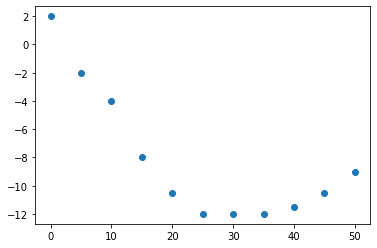

In [12]:
ka_real = [2,-2,-4,-8,-10.5,-12,-12,-12,-11.5,-10.5,-9]

plt.scatter(np.arange(0,55,5),ka_real)